## Heuristic search (A*)

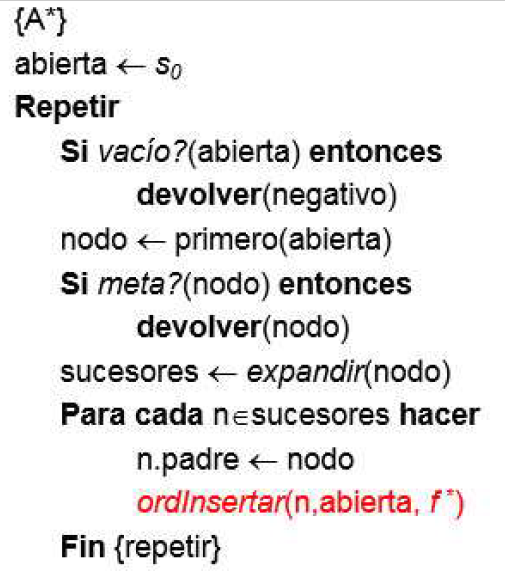

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
class Nodo:
    def __init__(self,nodo,nodosHijos=[],nodoPadre=None,costos=[],gn=0,hn=0):
        self.nodo = nodo
        self.nodosHijos = nodosHijos
        self.nodoPadre = None
        self.costos = []
        self.gn = gn
        self.hn = hn        
    def __str__(self):
        formato = "{0}"
        return formato.format(self.nodo)
    def __eq__(self, obj):
        return (self.nodo==obj.nodo)
    def __hash__(self):
        return hash(self.nodo)
    def calcularHeuristica(self):
        return self.gn + self.hn 

In [3]:
def sumar_costo_nodos(nodo):
    nodoTemp =nodo
    costo = 0
    while(nodoTemp):        
        nodoPadre = nodoTemp.nodoPadre        
        if not nodoPadre:
            break
        indice = nodoTemp.nodosHijos.index(nodoPadre) 
        costo += nodoTemp.costos[indice]
        nodoTemp = nodoPadre        
    return costo 

In [4]:
class CS:  
   
    def buscarGN(self,nodoInicial,nodoMeta):
        nodosAbiertos=[]
        nodosVisitados=[]
        nodosAbiertos.append(nodoInicial)
        contador=0
        while nodosAbiertos:
            imprimir_lista_abiertos(nodosAbiertos)
            imprimir_lista_visitados(nodosVisitados)
            nodo=nodosAbiertos.pop(0)
            if nodo==nodoMeta:
                return nodo,True,nodosVisitados
            nodosVisitados.append(nodo)
            contador=contador+1
            for nodohijo in nodo.nodosHijos:
                if not nodohijo in nodosVisitados:
                    indice=nodo.nodosHijos.index(nodohijo)
                    costo=nodo.costos[indice]
                    if not nodohijo in nodosAbiertos:
                        nodohijo.nodoPadre=nodo
                        nodohijo.gn=nodo.gn+costo
                        nodosAbiertos.append(nodohijo)
                    else:
                        indice=nodosAbiertos.index(nodohijo)
                        nodoAnterior=nodosAbiertos[indice]
                        padreTemp=nodohijo.nodoPadre
                        costoAnterior=nodoAnterior.gn
                        costoNuevo=nodo.gn+costo
                        print(costoAnterior,costoNuevo)
                        if costoNuevo<costoAnterior:
                            nodohijo.nodoPadre=nodo
                            nodohijo.gn=costoNuevo
                            nodosAbiertos[indice]=nodohijo
                        else:
                            nodohijo.nodoPadre=padreTemp
            nodosAbiertos=sorted(nodosAbiertos,key=lambda x:x.calcularHeuristica(), reverse=False)
        return None,False,nodosVisitados

In [5]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos 

In [6]:
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA), str(nodoB))],weight=j)  
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,5)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=1000,with_labels=True, font_weight='bold')        
    plt.show()

In [7]:
def imprimir_lista_abiertos(nodosAbiertos):    
    print("Nodos Abiertos")
    for nodoAbi in nodosAbiertos:
        print(str(nodoAbi)+"-"+str(nodoAbi.calcularHeuristica()))
    print("----------------------")

In [8]:
def imprimir_lista_visitados(nodosVisitados):    
    print("Nodos Visitados")
    for nodoVis in nodosVisitados:
        print(str(nodoVis))
    print("----------------------")

In [9]:
def crear_diccinario(nodo,figura,nodoVisitado):
        if not nodo:
            return -1
        else:        
            if not nodo in nodoVisitado:
                figura[nodo] = nodo.nodosHijos
                nodoVisitado.append(nodo)
                for nodoVecino in nodo.nodosHijos:
                    crear_diccinario(nodoVecino,figura,nodoVisitado)

In [10]:
def mostrar_grafica(nodoInicial):
    figura={}
    crear_diccinario(nodoInicial,figura,[])    
    node_graph=nx.DiGraph(figura)
    plt.figure(figsize=(15,5)) 
    pos_labels=nx.circular_layout(node_graph)
    nx.draw_spectral(node_graph,with_labels=True, font_weight='bold')
    plt.show()

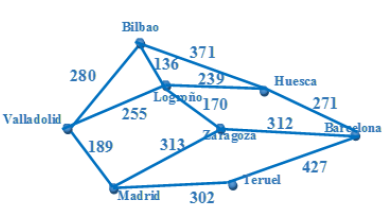

In [11]:
class FabricaNodos:
    def __init__(self):
        Valladolid = Nodo("Valladolid",hn=575)
        Madrid = Nodo("Madrid",hn=506)
        Huesca = Nodo("Huesca",hn=229)
        Logrono = Nodo("Logroño",hn=401)
        Bilbao = Nodo("Bilbao",hn=469)
        Zaragoza = Nodo("Zaragoza",hn=257)
        Barcelona = Nodo("Barcelona",hn=0)
        Teruel = Nodo("Teruel",hn=299)
        Valladolid.nodosHijos=[Bilbao,Logrono,Madrid]
        Valladolid.costos=[280,255,189]
        Bilbao.nodosHijos=[Valladolid,Logrono,Huesca]
        Bilbao.costos=[280,136,371]
        Logrono.nodosHijos=[Valladolid,Bilbao,Huesca,Zaragoza]
        Logrono.costos=[255,136,239,170]
        Zaragoza.nodosHijos=[Logrono,Madrid,Barcelona]
        Zaragoza.costos=[170,313,312]
        Madrid.nodosHijos=[Valladolid,Zaragoza,Teruel]
        Madrid.costos=[189,313,302]
        Teruel.nodosHijos=[Madrid,Barcelona]
        Teruel.costos=[302,427]
        Huesca.nodosHijos=[Bilbao,Logrono,Barcelona]
        Huesca.costos=[371,239,271]
        Barcelona.nodosHijos=[Huesca,Zaragoza,Teruel]
        Barcelona.costos=[271,312,427]
        self.Valladolid = Valladolid
        self.Madrid = Madrid
        self.Huesca = Huesca
        self.Logrono = Logrono
        self.Bilbao = Bilbao
        self.Zaragoza = Zaragoza
        self.Barcelona = Barcelona
        self.Teruel = Teruel         

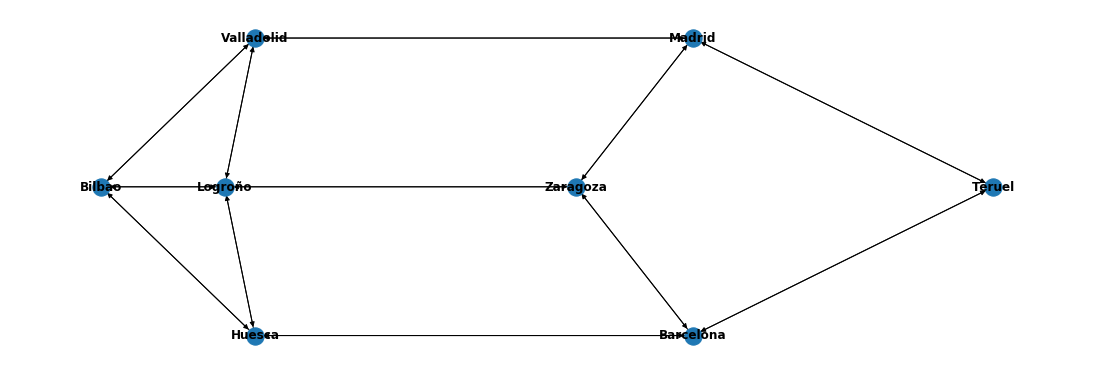

In [12]:
f = FabricaNodos()
mostrar_grafica(f.Valladolid)

Nodos Abiertos
Valladolid-575
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
Logroño-656
Madrid-695
Bilbao-749
----------------------
Nodos Visitados
Valladolid
----------------------
280 391
Nodos Abiertos
Zaragoza-682
Madrid-695
Huesca-723
Bilbao-749
----------------------
Nodos Visitados
Valladolid
Logroño
----------------------
189 738
Nodos Abiertos
Madrid-695
Huesca-723
Barcelona-737
Bilbao-749
----------------------
Nodos Visitados
Valladolid
Logroño
Zaragoza
----------------------
Nodos Abiertos
Huesca-723
Barcelona-737
Bilbao-749
Teruel-790
----------------------
Nodos Visitados
Valladolid
Logroño
Zaragoza
Madrid
----------------------
280 865
737 765
Nodos Abiertos
Barcelona-737
Bilbao-749
Teruel-790
----------------------
Nodos Visitados
Valladolid
Logroño
Zaragoza
Madrid
Huesca
----------------------


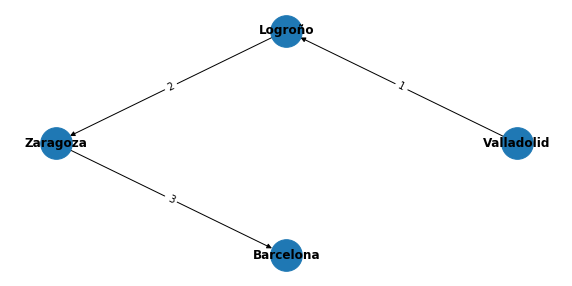

Nodos Visitados
Valladolid
Logroño
Zaragoza
Madrid
Huesca
----------------------


In [13]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.Valladolid,f.Barcelona)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

Nodos Abiertos
Madrid-506
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
Zaragoza-570
Teruel-601
Valladolid-764
----------------------
Nodos Visitados
Madrid
----------------------
Nodos Abiertos
Teruel-601
Barcelona-625
Valladolid-764
Logroño-884
----------------------
Nodos Visitados
Madrid
Zaragoza
----------------------
625 729
Nodos Abiertos
Barcelona-625
Valladolid-764
Logroño-884
----------------------
Nodos Visitados
Madrid
Zaragoza
Teruel
----------------------
Nodos Abiertos
Valladolid-764
Logroño-884
Huesca-1125
----------------------
Nodos Visitados
Madrid
Zaragoza
Teruel
Barcelona
----------------------
483 444
Nodos Abiertos
Logroño-845
Bilbao-938
Huesca-1125
----------------------
Nodos Visitados
Madrid
Zaragoza
Teruel
Barcelona
Valladolid
----------------------
469 580
896 683
Nodos Abiertos
Huesca-912
Bilbao-938
----------------------
Nodos Visitados
Madrid
Zaragoza
Teruel
Barcelona
Valladolid
Logroño
----------------------


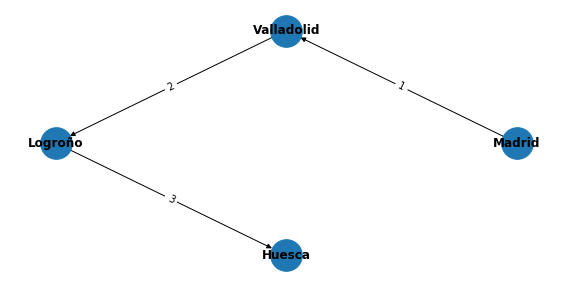

Nodos Visitados
Madrid
Zaragoza
Teruel
Barcelona
Valladolid
Logroño
----------------------


In [14]:
f = FabricaNodos()
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.Madrid,f.Huesca)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

In [15]:
class FabricaPrueba:
    def __init__(self):
        I = Nodo("I",hn=13)
        A = Nodo("A",hn=10)
        B = Nodo("B",hn=5)
        C = Nodo("C",hn=9)
        G = Nodo("G",hn=0)        
        I.nodosHijos=[A,B]
        I.costos=[5,4]
        A.nodosHijos=[I,B,C]
        A.costos=[5,3,3]
        B.nodosHijos=[I,A,G]
        B.costos=[4,3,10]
        C.nodosHijos=[A,G]
        C.costos=[3,6]
        G.nodosHijos=[C,B]
        G.costos=[6,10]
        self.I = I
        self.A = A
        self.B = B
        self.C = C
        self.G = G

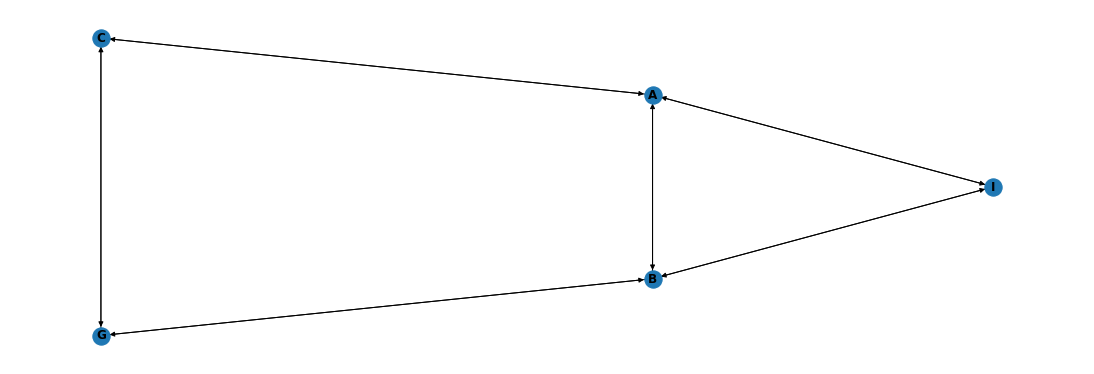

Nodos Abiertos
I-13
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
B-9
A-15
----------------------
Nodos Visitados
I
----------------------
5 7
Nodos Abiertos
G-14
A-15
----------------------
Nodos Visitados
I
B
----------------------


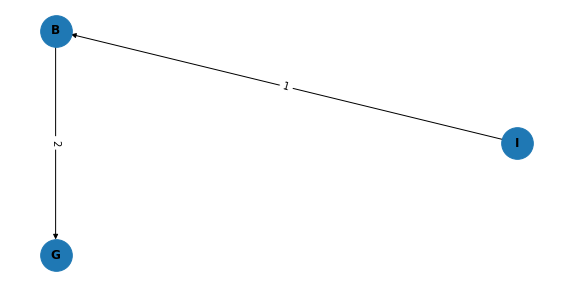

Nodos Visitados
I
B
----------------------


In [16]:
f = FabricaPrueba()
mostrar_grafica(f.I)
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.I,f.G)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)

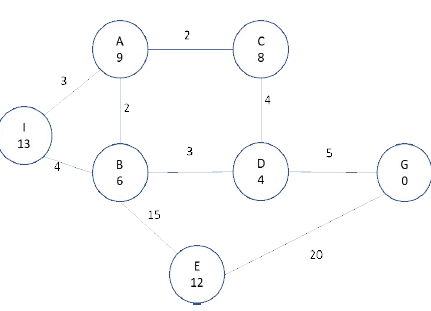

In [20]:
class FabricaExamen:
    def __init__(self):
        I = Nodo("I",hn=13)
        A = Nodo("A",hn=9)
        B = Nodo("B",hn=6)
        C = Nodo("C",hn=8)
        D = Nodo("D",hn=4)
        E = Nodo("E",hn=12)
        G = Nodo("G",hn=0)        
        I.nodosHijos=[A,B]
        I.costos=[3,4]
        A.nodosHijos=[I,B,C]
        A.costos=[3,2,2]
        B.nodosHijos=[I,A,D,E]
        B.costos=[4,2,3,15]
        C.nodosHijos=[A,D]
        C.costos=[2,4]
        D.nodosHijos=[B,C,G]
        D.costos=[3,4,5]
        E.nodosHijos=[B,G]
        E.costos=[15,20]
        G.nodosHijos=[D,E]
        G.costos=[5,20]
        self.I = I
        self.A = A
        self.B = B
        self.C = C
        self.D = D
        self.E = E
        self.G = G

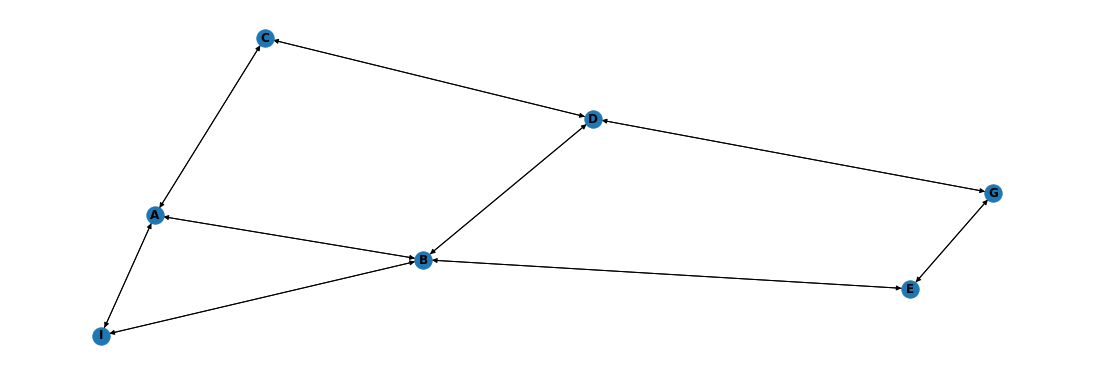

Nodos Abiertos
I-13
----------------------
Nodos Visitados
----------------------
Nodos Abiertos
B-10
A-12
----------------------
Nodos Visitados
I
----------------------
3 6
Nodos Abiertos
D-11
A-12
E-31
----------------------
Nodos Visitados
I
B
----------------------
Nodos Abiertos
A-12
G-12
C-19
E-31
----------------------
Nodos Visitados
I
B
D
----------------------
11 5
Nodos Abiertos
G-12
C-13
E-31
----------------------
Nodos Visitados
I
B
D
A
----------------------


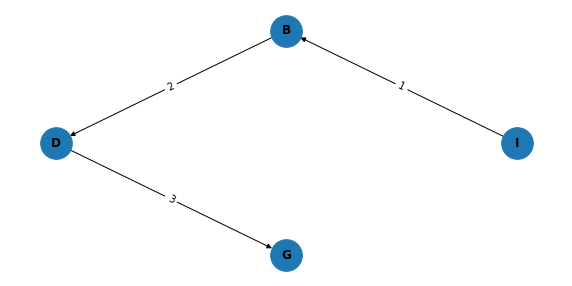

Nodos Visitados
I
B
D
A
----------------------


In [21]:
f = FabricaExamen()
mostrar_grafica(f.I)
cs = CS()
nodoMeta,estado,visitados = cs.buscarGN(f.I,f.G)
lista_nodos = crear_ruta_nodos(nodoMeta)
graficar_ruta_nodos(lista_nodos)
imprimir_lista_visitados(visitados)